In [ ]:
!unzip -qq "/content/drive/MyDrive/dl_data/fruit.zip"

In [2]:
!ls "/content/train/train/"

'Apple Braeburn'      'Cactus fruit'   'Grape Blue'    Orange	       'Pepper Red'   Strawberry
'Apple Granny Smith'   Cantaloupe       Kiwi	       Papaya	        Pineapple     Tomato
 Apricot	       Cherry	        Lemon	      'Passion Fruit'   Plum	      Watermelon
 Avocado	       Clementine       Limes	       Peach	        Pomegranate
 Banana		       Corn	        Mango	       Pear	       'Potato Red'
 Blueberry	      'Cucumber Ripe'  'Onion White'  'Pepper Green'    Raspberry


In [3]:
import glob
folder_list = glob.glob("/content/train/train/*")
folder_list

['/content/train/train/Cherry',
 '/content/train/train/Banana',
 '/content/train/train/Grape Blue',
 '/content/train/train/Papaya',
 '/content/train/train/Pear',
 '/content/train/train/Potato Red',
 '/content/train/train/Raspberry',
 '/content/train/train/Apple Braeburn',
 '/content/train/train/Pineapple',
 '/content/train/train/Peach',
 '/content/train/train/Corn',
 '/content/train/train/Blueberry',
 '/content/train/train/Tomato',
 '/content/train/train/Cucumber Ripe',
 '/content/train/train/Pepper Green',
 '/content/train/train/Mango',
 '/content/train/train/Limes',
 '/content/train/train/Orange',
 '/content/train/train/Clementine',
 '/content/train/train/Pepper Red',
 '/content/train/train/Passion Fruit',
 '/content/train/train/Pomegranate',
 '/content/train/train/Cantaloupe',
 '/content/train/train/Onion White',
 '/content/train/train/Plum',
 '/content/train/train/Apricot',
 '/content/train/train/Strawberry',
 '/content/train/train/Cactus fruit',
 '/content/train/train/Watermelon',

In [4]:
len(folder_list)

33

In [5]:
file_list = []
for each in folder_list:
    file_list.extend(glob.glob(each+"/*"))

file_list

['/content/train/train/Cherry/Cherry_325.jpg',
 '/content/train/train/Cherry/Cherry_143.jpg',
 '/content/train/train/Cherry/Cherry_156.jpg',
 '/content/train/train/Cherry/Cherry_37.jpg',
 '/content/train/train/Cherry/Cherry_354.jpg',
 '/content/train/train/Cherry/Cherry_213.jpg',
 '/content/train/train/Cherry/Cherry_437.jpg',
 '/content/train/train/Cherry/Cherry_137.jpg',
 '/content/train/train/Cherry/Cherry_18.jpg',
 '/content/train/train/Cherry/Cherry_125.jpg',
 '/content/train/train/Cherry/Cherry_8.jpg',
 '/content/train/train/Cherry/Cherry_202.jpg',
 '/content/train/train/Cherry/Cherry_436.jpg',
 '/content/train/train/Cherry/Cherry_477.jpg',
 '/content/train/train/Cherry/Cherry_251.jpg',
 '/content/train/train/Cherry/Cherry_454.jpg',
 '/content/train/train/Cherry/Cherry_85.jpg',
 '/content/train/train/Cherry/Cherry_66.jpg',
 '/content/train/train/Cherry/Cherry_83.jpg',
 '/content/train/train/Cherry/Cherry_381.jpg',
 '/content/train/train/Cherry/Cherry_312.jpg',
 '/content/train/tra

In [7]:
len(file_list)

16854

In [8]:
label_name = [each.split('/')[-2] for each in file_list]
label_name

['Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',

In [9]:
len(file_list), len(label_name)

(16854, 16854)

In [10]:
import pandas as pd

file_list_pd = pd.DataFrame({"path" : file_list, "label" : label_name})

file_list_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854 entries, 0 to 16853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    16854 non-null  object
 1   label   16854 non-null  object
dtypes: object(2)
memory usage: 263.5+ KB


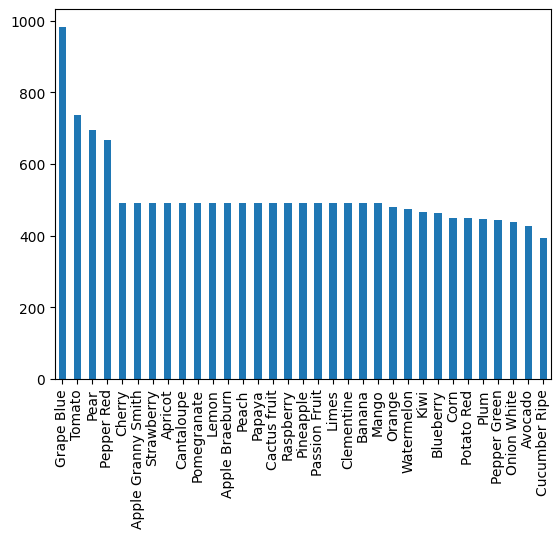

In [11]:
file_list_pd["label"].value_counts().plot.bar();

In [12]:
## 데이터를 확인하기 위해 한 라벨에서 한 데이터만 뽑자

random_sample = file_list_pd.groupby("label",
                                     group_keys=False).apply(lambda x : x.sample(1))

random_sample.head()

,path,label
4375,/content/train/train/Apple Braeburn/Apple Brae...,Apple Braeburn
15031,/content/train/train/Apple Granny Smith/Apple ...,Apple Granny Smith
13284,/content/train/train/Apricot/Apricot_405.jpg,Apricot
15960,/content/train/train/Avocado/Avocado_304.jpg,Avocado
596,/content/train/train/Banana/Banana_214.jpg,Banana


In [15]:
import matplotlib.pyplot as plt

def draw_sample_pic_from_file_list(df):
    fig = plt.figure(1, figsize = (24, 20))

    cnt = 1
    for idx, row in df.iterrows():
        if cnt > len(df): break

        plt.subplot(6,6,cnt)
        cnt+=1
        image = plt.imread(row["path"])
        plt.imshow(image)
        plt.axis("off")
        plt.title(row["label"])

    plt.tight_layout()
    plt.show()

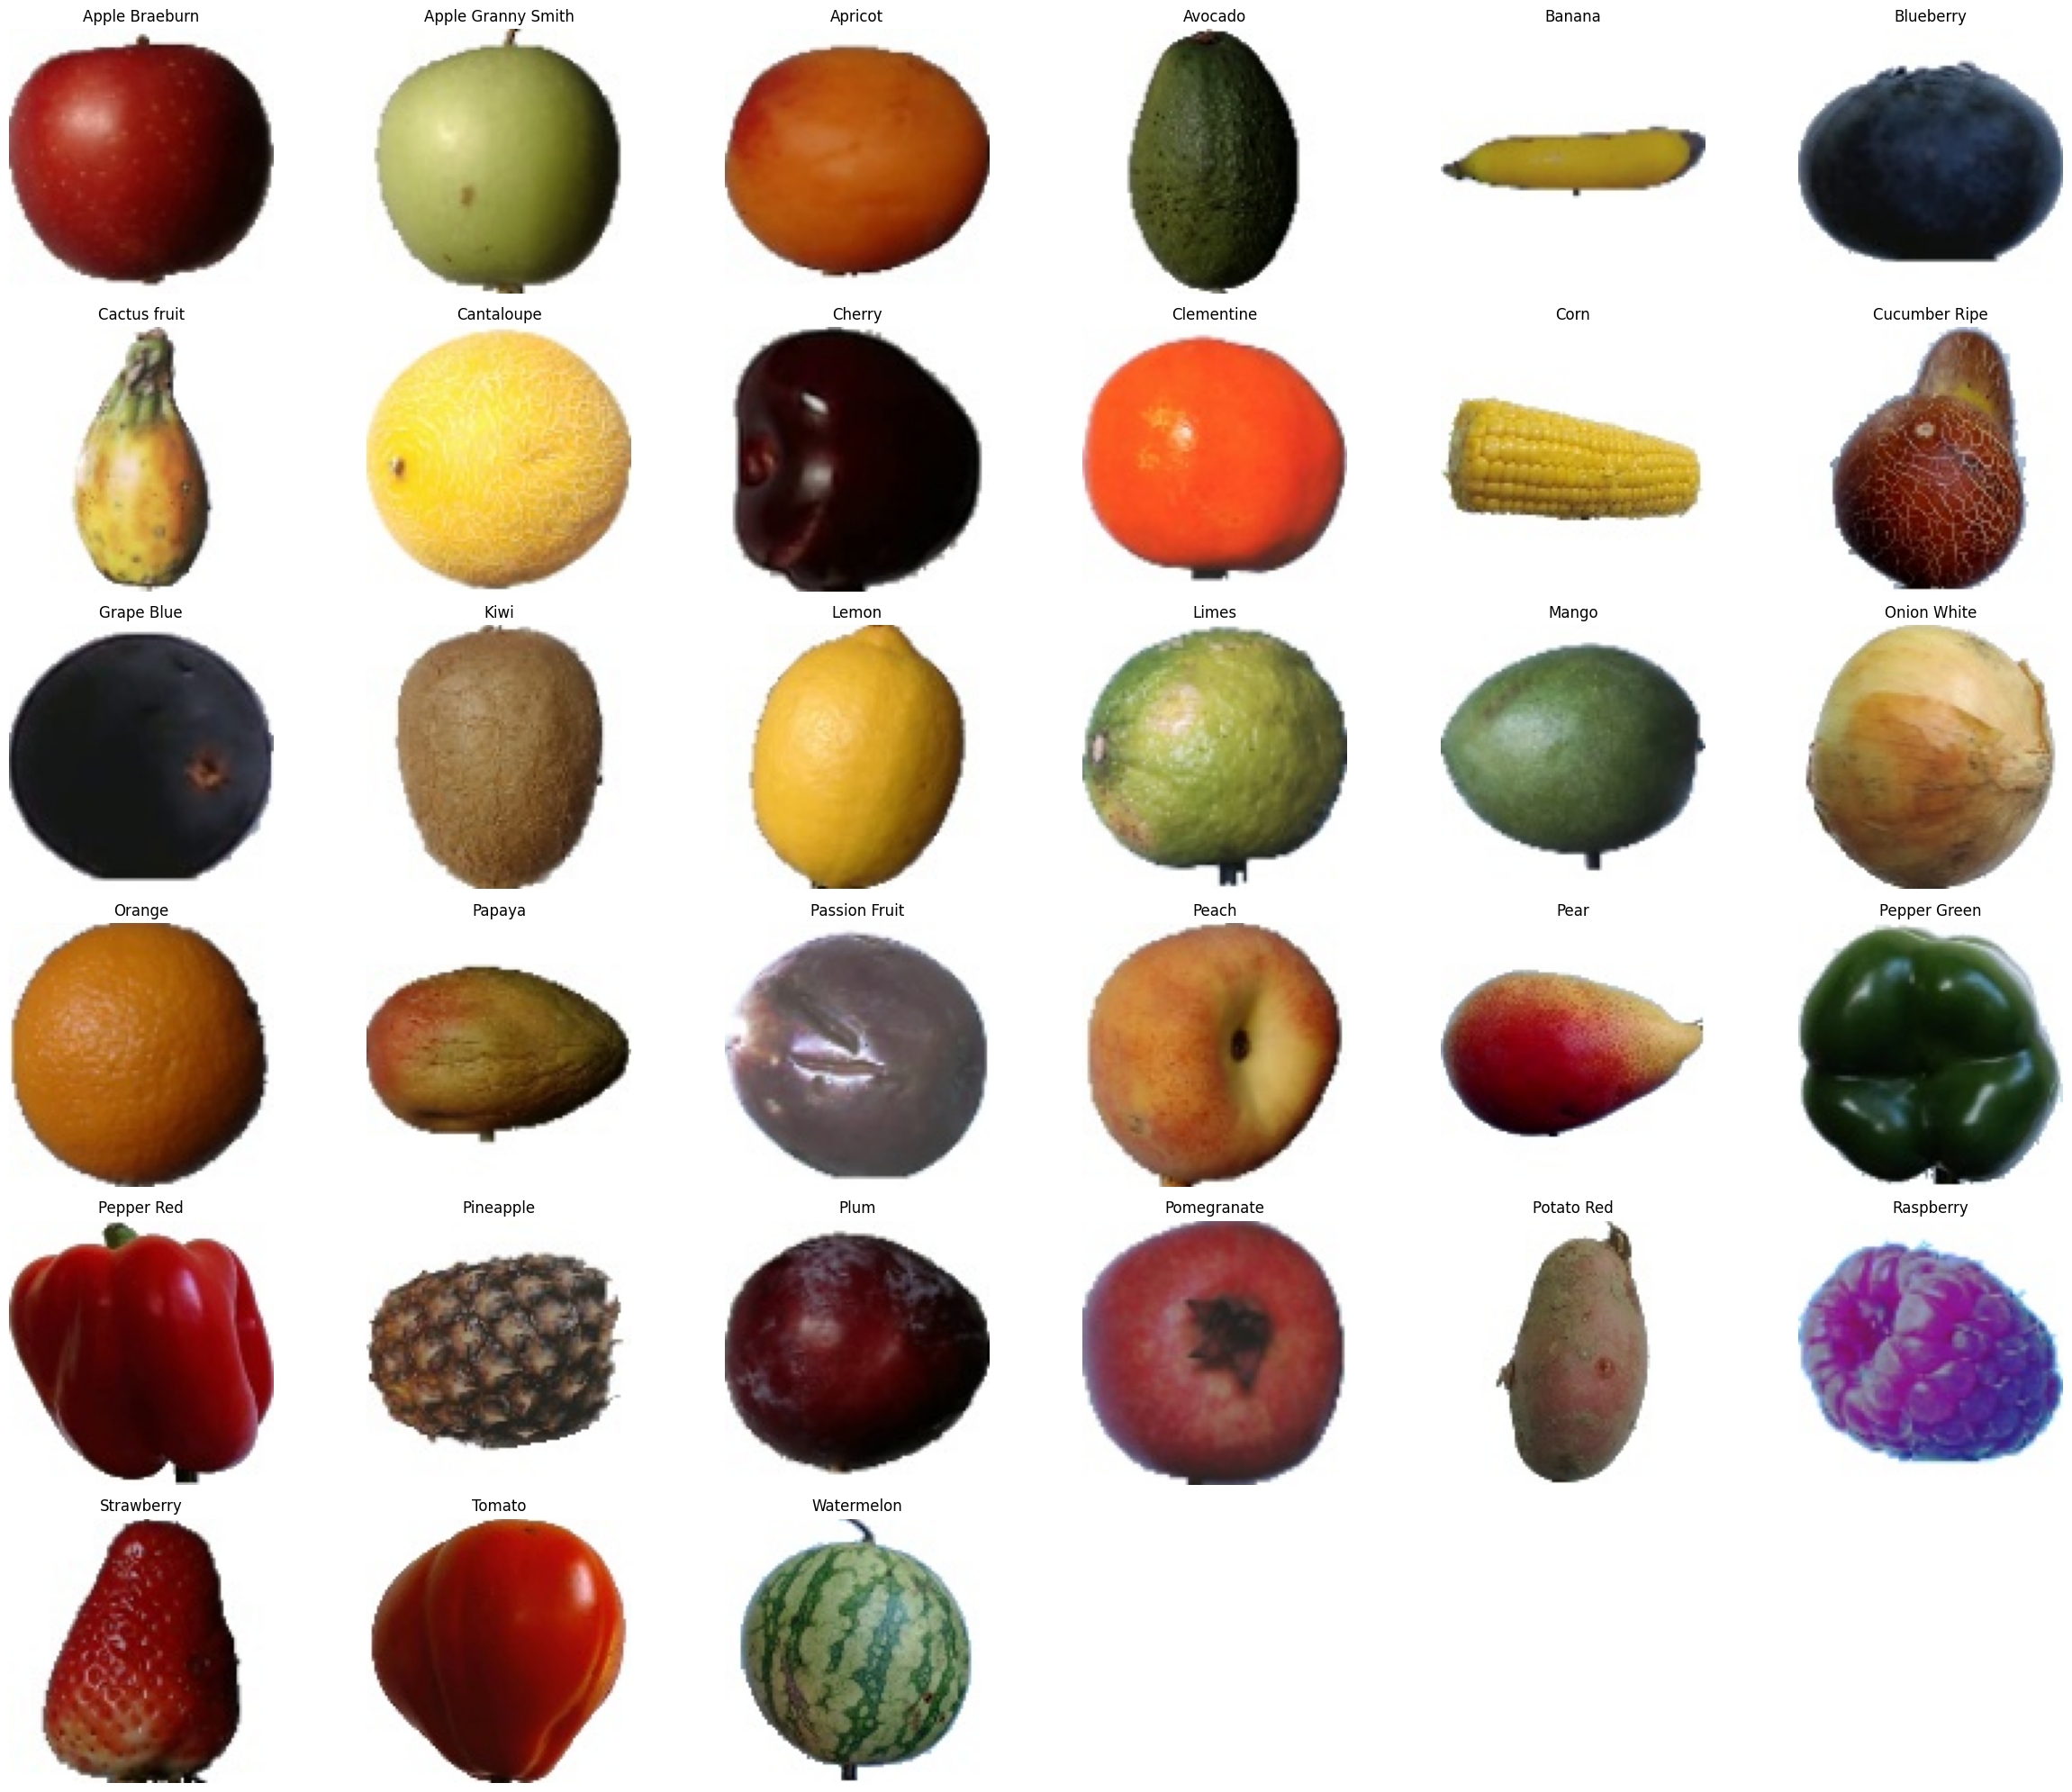

In [16]:
draw_sample_pic_from_file_list(random_sample)

In [17]:
from sklearn.model_selection import train_test_split

train_data_condi, test_data = train_test_split(file_list_pd,
                                               test_size = 0.1,
                                               stratify = file_list_pd["label"],
                                               random_state=13)

In [18]:
train_data, val_data = train_test_split(train_data_condi,
                                        test_size = 0.2,
                                        stratify = train_data_condi["label"],
                                        random_state = 13)

<Axes: >

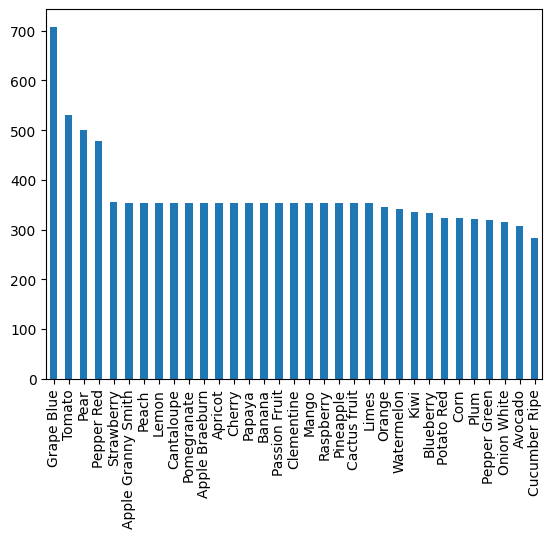

In [19]:
train_data["label"].value_counts().plot.bar()

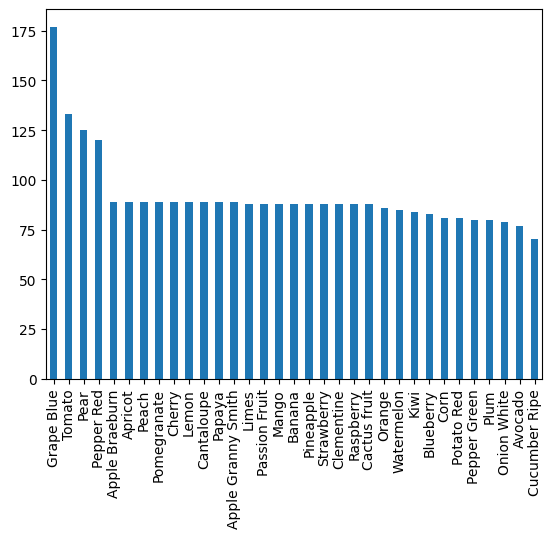

In [20]:
val_data["label"].value_counts().plot.bar();

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

train_generator = train_data_gen.flow_from_dataframe(
    dataframe = train_data,
    target_size = (150,150),
    class_mode = "categorical",
    x_col = "path",
    y_col = "label"
)

Found 12134 validated image filenames belonging to 33 classes.


In [22]:
val_data_gen = ImageDataGenerator(rescale=1./255)

val_generator = val_data_gen.flow_from_dataframe(
    dataframe = val_data,
    x_col = "path",
    y_col = "label",
    class_mode = "categorical",
    target_size = (150, 150),
    seed  =13,
    shuffle = False
)

Found 3034 validated image filenames belonging to 33 classes.


In [23]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_dataframe(
    dataframe = test_data,
    x_col = "path",
    y_col = "label",
    class_mode = "categorical",
    target_size = (150,150),
    seed = 13,
    shuffle = False
)

Found 1686 validated image filenames belonging to 33 classes.


In [24]:
from tensorflow.keras import layers,models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = "relu", input_shape =(150,150,3),
                  padding="same"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation = "relu", padding = "same"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(len(folder_list), activation="softmax")

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [25]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [27]:
hist = model.fit(train_generator, epochs=5, validation_data = val_generator)

Epoch 1/5
380/380 [==============================] - 127s 298ms/step - loss: 0.9249 - accuracy: 0.7080 - val_loss: 0.1511 - val_accuracy: 0.9463
Epoch 2/5
380/380 [==============================] - 103s 271ms/step - loss: 0.1281 - accuracy: 0.9581 - val_loss: 0.0116 - val_accuracy: 0.9980
Epoch 3/5
380/380 [==============================] - 101s 265ms/step - loss: 0.0883 - accuracy: 0.9711 - val_loss: 0.0193 - val_accuracy: 0.9944
Epoch 4/5
380/380 [==============================] - 96s 252ms/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0187 - val_accuracy: 0.9944
Epoch 5/5
380/380 [==============================] - 114s 300ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0175 - val_accuracy: 0.9924


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_history(hist, targets, labels, axes_num):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    for i in range(4):
        sns.lineplot(x = range(len(hist.history[targets[i]])),
                     y = hist.history[targets[i]], ax = ax[axes_num[i]], label = labels[i])

    ax[0].set_title("loss")
    ax[1].set_title("accuracy")
    sns.despine()
    plt.show()

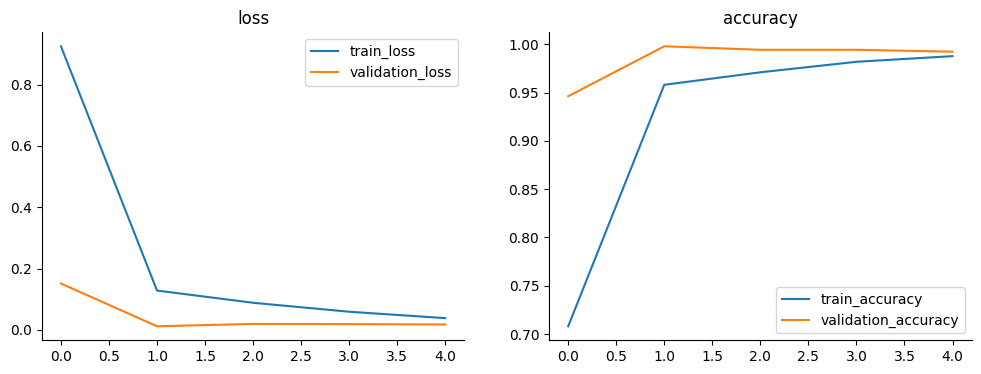

In [33]:
targets = ["loss", "val_loss", "accuracy", "val_accuracy"]
labels = ["train_loss", "validation_loss", "train_accuracy", "validation_accuracy"]

axes_num = [0,0,1,1]
draw_history(hist, targets, labels, axes_num)

In [34]:
loss, accuracy = model.evaluate(test_generator)
print("loss = {:.5f}".format(loss))
print("accuracy = {:.5f}".format(accuracy))

53/53 [==============================] - 2s 31ms/step - loss: 0.0112 - accuracy: 0.9958
loss = 0.01124
accuracy = 0.99585


In [35]:
idx = 28

test_tmp = test_data.iloc[idx,0]
test_tmp

'/content/train/train/Strawberry/Strawberry_480.jpg'

In [49]:
import cv2

image = cv2.imread(test_tmp)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (150,150))
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [50]:
import matplotlib.image as mpimg
from skimage.transform import resize

image = mpimg.imread(test_tmp)
image = resize(image, (150,150))
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [51]:
image = image.reshape(1, 150, 150, 3)
result = model.predict(image)
result

1/1 [==============================] - 0s 183ms/step


array([[5.4741374e-08, 1.3537148e-15, 3.8983231e-14, 2.5122954e-13,
        6.6086154e-15, 2.0693733e-10, 9.3619898e-19, 7.4995547e-21,
        9.2290705e-08, 8.6664598e-18, 8.9087079e-18, 2.0526468e-10,
        1.6625969e-15, 5.8117836e-15, 3.3607776e-17, 1.4305720e-22,
        2.6182877e-15, 1.1159022e-18, 3.1788557e-14, 2.9882997e-13,
        2.3896466e-18, 6.8504664e-14, 2.1112610e-12, 3.7336172e-14,
        2.0845608e-11, 6.9295150e-17, 1.2833552e-10, 2.1116637e-12,
        6.4211544e-19, 5.3951350e-14, 9.9999988e-01, 6.3413284e-14,
        5.0473548e-18]], dtype=float32)

In [52]:
test_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Granny Smith': 1,
 'Apricot': 2,
 'Avocado': 3,
 'Banana': 4,
 'Blueberry': 5,
 'Cactus fruit': 6,
 'Cantaloupe': 7,
 'Cherry': 8,
 'Clementine': 9,
 'Corn': 10,
 'Cucumber Ripe': 11,
 'Grape Blue': 12,
 'Kiwi': 13,
 'Lemon': 14,
 'Limes': 15,
 'Mango': 16,
 'Onion White': 17,
 'Orange': 18,
 'Papaya': 19,
 'Passion Fruit': 20,
 'Peach': 21,
 'Pear': 22,
 'Pepper Green': 23,
 'Pepper Red': 24,
 'Pineapple': 25,
 'Plum': 26,
 'Pomegranate': 27,
 'Potato Red': 28,
 'Raspberry': 29,
 'Strawberry': 30,
 'Tomato': 31,
 'Watermelon': 32}

In [53]:
import numpy as np

d = test_generator.class_indices

answer = [k for k ,v in d.items() if v == np.argmax(result)][0]

answer

'Strawberry'

In [56]:
def check_pred_one_file(path,label):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150,150))
    image = image/255.

    image = image.reshape(1,150,150,3)
    result = model.predict(image, verbose=0)

    answer = [k for k, v in d.items() if v == np.argmax(result)][0]

    return label, answer

In [57]:
idx = 23


print(check_pred_one_file(test_data.iloc[idx,0], test_data.iloc[idx,1]))

('Orange', 'Orange')


In [61]:
from tqdm import tqdm

wrong_result_path = []
wrong_result_true_label =[]
wrong_result = []

d = test_generator.class_indices

In [62]:
for idx, row in tqdm(test_data.iterrows(), total = test_data.shape[0]):
    label, answer = check_pred_one_file(row["path"], row["label"])

    if label != answer:
        wrong_result_path.append(row["path"])
        wrong_result_true_label.append(row["label"])
        wrong_result.append(answer)

100%|██████████| 1686/1686 [02:03<00:00, 13.70it/s]


In [63]:
wrong_result_pd = pd.DataFrame({"label" : wrong_result_true_label,
                                "predict" : wrong_result,
                                "path" : wrong_result_path})
wrong_result_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    2 non-null      object
 1   predict  2 non-null      object
 2   path     2 non-null      object
dtypes: object(3)
memory usage: 176.0+ bytes


In [64]:
wrong_result_pd

,label,predict,path
0,Apricot,Orange,/content/train/train/Apricot/Apricot_148.jpg
1,Pear,Watermelon,/content/train/train/Pear/Pear_75.jpg


In [65]:
def draw_sample_pic_from_file_list(df):
    fig = plt.figure(1, figsize=(24,20))

    cnt = 1
    for idx, row in df.iterrows():
        if cnt > len(df):
            break

        plt.subplot(6, 6, cnt)
        cnt+=1
        image = plt.imread(row["path"])
        plt.imshow(image)
        plt.axis("off")
        plt.title("T : " +row["label"] + " , " + "P : " + row["predict"])

    plt.tight_layout()
    plt.show()

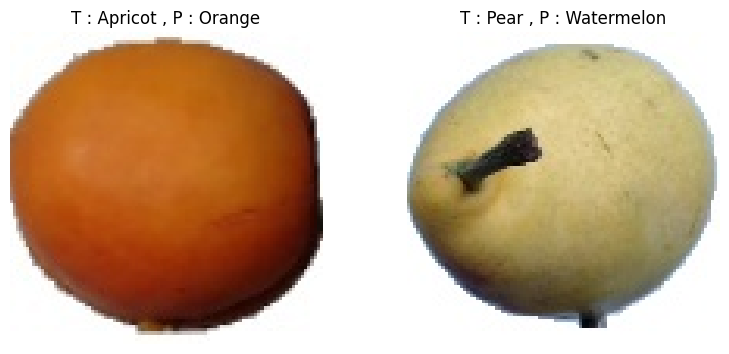

In [66]:
draw_sample_pic_from_file_list(wrong_result_pd)